# Import Libraries 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale


import pickle

from sklearn import __version__ as sklearn_version
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, learning_curve
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_regression
import datetime
from sklearn.metrics import accuracy_score


# Show plots inline
%matplotlib inline

In [2]:
pip install shap

Note: you may need to restart the kernel to use updated packages.


In [3]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

# Data Collection and Acquisition

In [4]:
# Code task 1 - Gather data
# Load CSV from a local file

df = pd.read_csv('df_features.csv')
df.head()

,User ID,Product ID,Product Name,Brand,Category,Price,Rating,Color,Size
0,19,1,Dress,Adidas,Men's Fashion,40,1.043159,Black,XL
1,97,2,Shoes,H&M,Women's Fashion,82,4.026416,Black,L
2,25,3,Dress,Adidas,Women's Fashion,44,3.337938,Yellow,XL
3,57,4,Shoes,Zara,Men's Fashion,23,1.049523,White,S
4,79,5,T-shirt,Adidas,Men's Fashion,79,4.302773,Black,M


In [5]:
# Show the segmented DataFrame
print(df.head())

   User ID  Product ID Product Name   Brand         Category  Price    Rating  \
0       19           1        Dress  Adidas    Men's Fashion     40  1.043159   
1       97           2        Shoes     H&M  Women's Fashion     82  4.026416   
2       25           3        Dress  Adidas  Women's Fashion     44  3.337938   
3       57           4        Shoes    Zara    Men's Fashion     23  1.049523   
4       79           5      T-shirt  Adidas    Men's Fashion     79  4.302773   

    Color Size  
0   Black   XL  
1   Black    L  
2  Yellow   XL  
3   White    S  
4   Black    M  


In [6]:
# Code task 4
# Check the format of all columns

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   User ID       1000 non-null   int64  
 1   Product ID    1000 non-null   int64  
 2   Product Name  1000 non-null   object 
 3   Brand         1000 non-null   object 
 4   Category      1000 non-null   object 
 5   Price         1000 non-null   int64  
 6   Rating        1000 non-null   float64
 7   Color         1000 non-null   object 
 8   Size          1000 non-null   object 
dtypes: float64(1), int64(3), object(5)
memory usage: 70.4+ KB


# Feature Encoding

# Handling Non-Numeric Features (Categorical variables)

Encoding all non-numeric features such as "Product Name", "Brand", "Category", "Color", "Size" and User ID into numeric values

In [7]:
# Code task 17
#Create dummy or indicator features for categorical variable "Product Name", "Brand", "Category", "Color", "Size"

from sklearn.preprocessing import OneHotEncoder

#categorical data
categorical_cols = ["Product Name", "Brand", "Category", "Color", "Size", "User ID"]


#import pandas as pd
df_new = pd.get_dummies(df, columns = categorical_cols, dtype=int)
df_new

,Product ID,Price,Rating,Product Name_Dress,Product Name_Jeans,Product Name_Shoes,Product Name_Sweater,Product Name_T-shirt,Brand_Adidas,Brand_Gucci,...,User ID_91,User ID_92,User ID_93,User ID_94,User ID_95,User ID_96,User ID_97,User ID_98,User ID_99,User ID_100
0,1,40,1.043159,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,82,4.026416,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,3,44,3.337938,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,4,23,1.049523,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,79,4.302773,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,55,1.620081,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
996,997,13,1.544464,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
997,998,47,3.961913,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
998,999,68,3.089722,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


Here, we have created a feature matrix where:

Product ID and Price are identifiers.
Rating is the target variable.
Rest all are the features including User ID as this feature is iterative and repeats several times in the dataset.Choosing User ID as a categorical variable will allow us to capture a group-specific patterns such as preferences, activity levels.

In [8]:
# Code task 18
# Check the shape of the new dataframe (including newly encoded columns) in the DataFrame

print(df_new.shape)

(1000, 126)


In [9]:
# Code task 19
# Check the format of all columns (including newly encoded columns) in the DataFrame

df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Columns: 126 entries, Product ID to User ID_100
dtypes: float64(1), int64(125)
memory usage: 984.5 KB


All columns are now numeric.

In [10]:
# Code task 20
# Check the description of all the numerical columns (including newly encoded columns) in the DataFrame

df_new.describe()

,Product ID,Price,Rating,Product Name_Dress,Product Name_Jeans,Product Name_Shoes,Product Name_Sweater,Product Name_T-shirt,Brand_Adidas,Brand_Gucci,...,User ID_91,User ID_92,User ID_93,User ID_94,User ID_95,User ID_96,User ID_97,User ID_98,User ID_99,User ID_100
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,55.785000,2.993135,0.176000,0.231000,0.222000,0.170000,0.201000,0.198000,0.191000,...,0.010000,0.013000,0.008000,0.010000,0.009000,0.006000,0.009000,0.014000,0.008000,0.013000
std,288.819436,26.291748,1.153185,0.381011,0.421683,0.415799,0.375821,0.400949,0.398692,0.393286,...,0.099549,0.113331,0.089129,0.099549,0.094488,0.077266,0.094488,0.117549,0.089129,0.113331
min,1.000000,10.000000,1.000967,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,250.750000,33.000000,1.992786,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,500.500000,57.000000,2.984003,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,750.250000,78.250000,3.985084,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1000.000000,100.000000,4.987964,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Train/Test Split

Partition sizes with a 70/30 train/test split

In [11]:
len(df_new) * .7, len(df_new) * .3

(700.0, 300.0)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(df_new.drop(columns='Rating'), 
                                                    df_new.Rating, test_size=0.3, 
                                                    random_state=47)

In [13]:
X_train.shape, X_test.shape

((700, 125), (300, 125))

In [14]:
y_train.shape, y_test.shape

((700,), (300,))

In [15]:
#Check the `dtypes` attribute of `X_train` to verify all features are numeric
X_train.dtypes

Product ID            int64
Price                 int64
Product Name_Dress    int64
Product Name_Jeans    int64
Product Name_Shoes    int64
                      ...  
User ID_96            int64
User ID_97            int64
User ID_98            int64
User ID_99            int64
User ID_100           int64
Length: 125, dtype: object

In [16]:
#Repeat this check for the test split in `X_test`
X_test.dtypes

Product ID            int64
Price                 int64
Product Name_Dress    int64
Product Name_Jeans    int64
Product Name_Shoes    int64
                      ...  
User ID_96            int64
User ID_97            int64
User ID_98            int64
User ID_99            int64
User ID_100           int64
Length: 125, dtype: object

We have only numeric features in our X now!

In [17]:
import pandas as pd
correlation_matrix = X_train.corr()
correlation_matrix

,Product ID,Price,Product Name_Dress,Product Name_Jeans,Product Name_Shoes,Product Name_Sweater,Product Name_T-shirt,Brand_Adidas,Brand_Gucci,Brand_H&M,...,User ID_91,User ID_92,User ID_93,User ID_94,User ID_95,User ID_96,User ID_97,User ID_98,User ID_99,User ID_100
Product ID,1.000000,0.031849,-0.029918,-0.016729,0.003803,-0.005886,0.045760,-0.022720,0.025691,0.017367,...,0.045137,-0.039204,-0.028704,0.063729,-0.052992,-0.011742,-0.016238,0.002743,0.002971,0.005633
Price,0.031849,1.000000,-0.026251,-0.029504,0.007858,0.001393,0.044575,-0.052877,0.020282,0.023653,...,0.008690,-0.043734,-0.069766,-0.008868,0.042786,0.059240,0.025930,0.049202,0.041065,0.027283
Product Name_Dress,-0.029918,-0.026251,1.000000,-0.240130,-0.247085,-0.200679,-0.234151,0.023918,-0.054205,-0.004127,...,0.023386,0.023386,-0.006903,0.069799,0.031448,0.016489,-0.045255,-0.017516,-0.038192,0.010106
Product Name_Jeans,-0.016729,-0.029504,-0.240130,1.000000,-0.292640,-0.237679,-0.277322,-0.038655,0.055345,-0.015340,...,-0.024971,0.007399,0.084720,0.050140,0.050140,0.005217,-0.053598,-0.030322,-0.045234,0.022781
Product Name_Shoes,0.003803,0.007858,-0.247085,-0.292640,1.000000,-0.244562,-0.285354,0.029593,0.008511,0.007060,...,0.004735,-0.027133,-0.021107,-0.055150,-0.055150,0.003338,0.081023,0.027576,-0.006321,-0.008971
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
User ID_96,-0.011742,0.059240,0.016489,0.005217,0.003338,0.017185,-0.039422,-0.035862,-0.036887,0.104791,...,-0.008151,-0.008151,-0.007619,-0.007619,-0.007619,1.000000,-0.007619,-0.008652,-0.006430,-0.009126
User ID_97,-0.016238,0.025930,-0.045255,-0.053598,0.081023,-0.006178,0.017889,-0.010400,-0.012408,0.021954,...,-0.010806,-0.010806,-0.010101,-0.010101,-0.010101,-0.007619,1.000000,-0.011470,-0.008525,-0.012099
User ID_98,0.002743,0.049202,-0.017516,-0.030322,0.027576,-0.050863,0.064569,-0.021182,-0.023299,0.006766,...,-0.012271,-0.012271,-0.011470,-0.011470,-0.011470,-0.008652,-0.011470,1.000000,-0.009680,-0.013739
User ID_99,0.002971,0.041065,-0.038192,-0.045234,-0.006321,0.007821,0.080222,0.003762,-0.041270,0.085351,...,-0.009120,-0.009120,-0.008525,-0.008525,-0.008525,-0.006430,-0.008525,-0.009680,1.000000,-0.010211


# Method 1 - Random Forest Model

# Define the pipeline

In [18]:
#Define a pipeline comprising the steps:
#SimpleImputer() with a strategy of 'median'
#StandardScaler(),
#and then RandomForestRegressor() with a random state of 47
RF_pipe = make_pipeline(
    RandomForestRegressor(n_estimators=100, max_depth=10, random_state=47, min_samples_split=10)
)

In [19]:
X_train.head()

,Product ID,Price,Product Name_Dress,Product Name_Jeans,Product Name_Shoes,Product Name_Sweater,Product Name_T-shirt,Brand_Adidas,Brand_Gucci,Brand_H&M,...,User ID_91,User ID_92,User ID_93,User ID_94,User ID_95,User ID_96,User ID_97,User ID_98,User ID_99,User ID_100
128,129,85,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
492,493,88,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
303,304,85,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
120,121,96,0,0,0,0,1,0,1,0,...,0,0,0,0,1,0,0,0,0,0
455,456,14,0,0,1,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0


# Fit and assess performance using cross-validation

In [20]:
#Call `cross_validate` to estimate the pipeline's performance.
#Pass it the random forest pipe object, `X_train` and `y_train`,
#and get it to use 5-fold cross-validation
rf_default_cv_results = cross_validate(RF_pipe, X_train, y_train, cv=5, scoring='r2')


In [21]:
rf_cv_scores = rf_default_cv_results['test_score']
rf_cv_scores

array([-0.08510275, -0.04638444, -0.0604558 , -0.08500282, -0.08479429])

In [22]:
np.mean(rf_cv_scores), np.std(rf_cv_scores)

(-0.0723480210647491, 0.01608271694522138)

# Hyperparameter search using GridSearchCV

In [23]:
n_est = [100, 200, 300]
max_depth=[5, 10, 20]
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
grid_params = {
    'randomforestregressor__n_estimators': n_est, 
    'randomforestregressor__max_depth': max_depth,
    'randomforestregressor__min_samples_split': min_samples_split,
    'randomforestregressor__min_samples_leaf': min_samples_leaf
}
grid_params

{'randomforestregressor__n_estimators': [100, 200, 300],
 'randomforestregressor__max_depth': [5, 10, 20],
 'randomforestregressor__min_samples_split': [2, 5, 10],
 'randomforestregressor__min_samples_leaf': [1, 2, 4]}

In [24]:
#Call `GridSearchCV` with the random forest pipeline, passing in the above `grid_params`
#dict for parameters to evaluate, 5-fold cross-validation, and all available CPU cores (if desired)
rf_grid_cv = GridSearchCV(RF_pipe, param_grid=grid_params, cv=5, n_jobs=-1)

In [25]:
#Now call the `GridSearchCV`'s `fit()` method with `X_train` and `y_train` as arguments
#to actually start the grid search. This may take a minute or two.
rf_grid_cv.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('randomforestregressor',
                                        RandomForestRegressor(max_depth=10,
                                                              min_samples_split=10,
                                                              random_state=47))]),
             n_jobs=-1,
             param_grid={'randomforestregressor__max_depth': [5, 10, 20],
                         'randomforestregressor__min_samples_leaf': [1, 2, 4],
                         'randomforestregressor__min_samples_split': [2, 5, 10],
                         'randomforestregressor__n_estimators': [100, 200,
                                                                 300]})

In [26]:
#Print the best params (`best_params_` attribute) from the grid search
rf_grid_cv.best_params_

{'randomforestregressor__max_depth': 5,
 'randomforestregressor__min_samples_leaf': 2,
 'randomforestregressor__min_samples_split': 2,
 'randomforestregressor__n_estimators': 100}

In [27]:
rf_best_cv_results = cross_validate(rf_grid_cv.best_estimator_, X_train, y_train, cv=5)
rf_best_scores = rf_best_cv_results['test_score']
rf_best_scores

array([-0.02863426, -0.01790079, -0.0359047 , -0.05333219, -0.05815839])

In [28]:
np.mean(rf_best_scores), np.std(rf_best_scores)

(-0.038786066132453945, 0.015062753201315905)

There is a slight improvement in performance after performing a hyperparameter tuning as compared to has been seen from the default CV results.

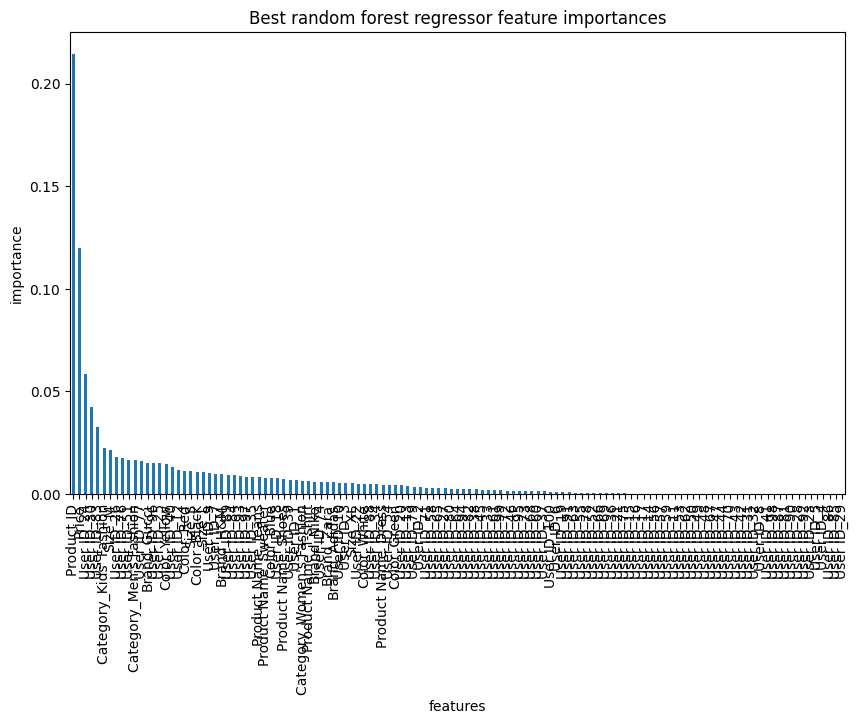

In [29]:
#Plot a barplot of the random forest's feature importances,
#assigning the `feature_importances_` attribute of 
#`rf_grid_cv.best_estimator_.named_steps.randomforestregressor` to the name `imps` to then
#create a pandas Series object of the feature importances, with the index given by the
#training data column names, sorting the values in descending order
plt.subplots(figsize=(10, 6))
imps = rf_grid_cv.best_estimator_.named_steps.randomforestregressor.feature_importances_
rf_feat_imps = pd.Series(imps, index=X_train.columns).sort_values(ascending=False)
rf_feat_imps.plot(kind='bar')
plt.xlabel('features')
plt.ylabel('importance')
plt.title('Best random forest regressor feature importances');

Product ID                0.214456
Price                     0.119717
User ID_24                0.058365
User ID_30                0.042336
User ID_83                0.032441
Category_Kids' Fashion    0.022208
Size_M                    0.021570
User ID_26                0.017990
User ID_76                0.017415
User ID_51                0.016763
Category_Men's Fashion    0.016730
User ID_77                0.015884
Brand_Gucci               0.015277
User ID_96                0.015061
User ID_25                0.014887
Color_Yellow              0.014822
User ID_40                0.013126
User ID_12                0.011466
Color_Red                 0.011280
Size_S                    0.011012
dtype: float64


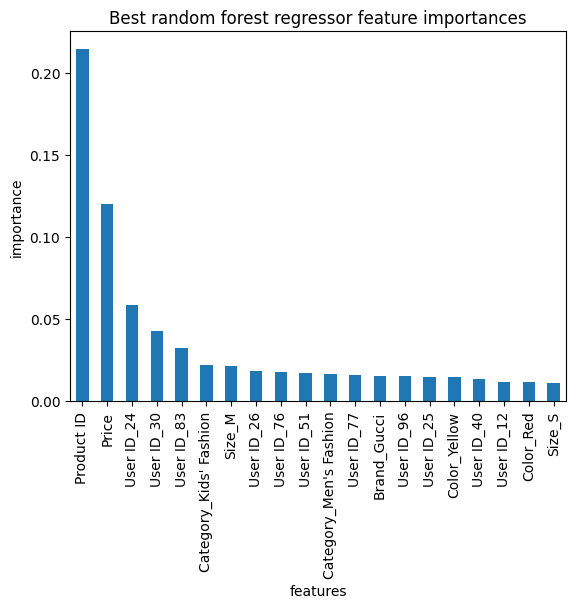

In [30]:
# Get the top N important features (e.g., top 3)
top_n = 20
top_features = rf_feat_imps.head(top_n)

# Print top N features
print(top_features)

top_features.plot(kind='bar')
plt.xlabel('features')
plt.ylabel('importance')
plt.title('Best random forest regressor feature importances');

A bar plot of feature importances above helps us identify following features contribute most to a model’s predictions:
Product ID, Price, User ID_24, User ID_30, User ID_83, Category_Kids Fashion, Size_M, User ID_26, User ID_76, User ID_51 are all top features.

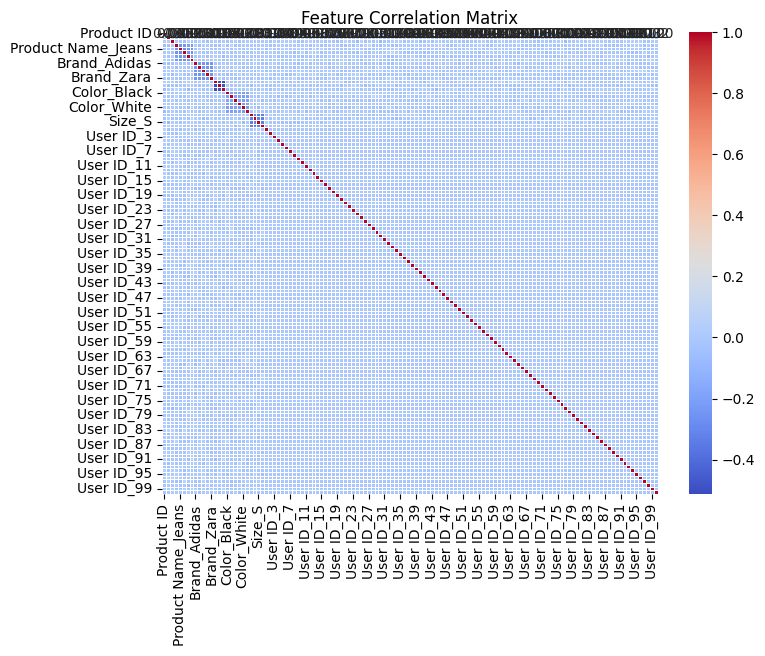

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pearson correlation matrix
corr_matrix = df_new.corr(method='pearson')

# Plotting the correlation matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Feature Correlation Matrix')
plt.show()

In [32]:
# Predict on the test set
y_pred = rf_grid_cv.predict(X_test)

# Display predicted ratings
print(y_pred)

[2.96208061 2.97772733 2.99083566 2.84131973 2.94328758 2.95821934
 2.91253794 2.97608865 3.00507063 2.98187151 3.12935037 3.30427615
 3.10941129 2.54288966 3.06370995 2.93185083 2.99106521 2.5195415
 2.71671249 3.08801391 2.95057023 3.05451143 2.91060092 2.98447483
 2.89740314 2.97925698 2.94438079 3.05512605 2.95872983 2.9348235
 2.98025771 2.9692879  3.02799853 2.75773278 2.91980291 3.03876253
 3.10580018 2.87190694 3.05658733 3.01604285 2.92947341 3.09626146
 2.92038924 2.96732708 3.0445053  2.88517935 3.01107097 3.01111182
 3.14266059 2.89229373 3.14103302 2.91650387 2.97297498 2.97699614
 2.96865066 2.99480882 2.91326258 3.04808121 2.89854984 2.99474815
 3.0155295  3.05924716 2.9840223  3.03797786 2.93161168 3.16754033
 2.95557824 2.99838069 3.08799343 2.96429333 3.01888324 2.74821072
 2.98798618 2.99785648 3.07728958 3.04659581 2.9603935  3.04526146
 2.92724856 2.94182927 3.11268327 3.0445908  2.94903429 3.03306755
 3.05615934 2.99299253 3.09906909 2.94253115 3.09315925 2.815638

In [33]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Mean Squared Error: {mse:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")
print(f"RMSE: {rmse}")
print(f"R-squared: {r2:.2f}")


Mean Squared Error: 1.28
Mean Absolute Error: 0.96
RMSE: 1.1317405208175737
R-squared: 0.01


This is an issue, R square still not significant.

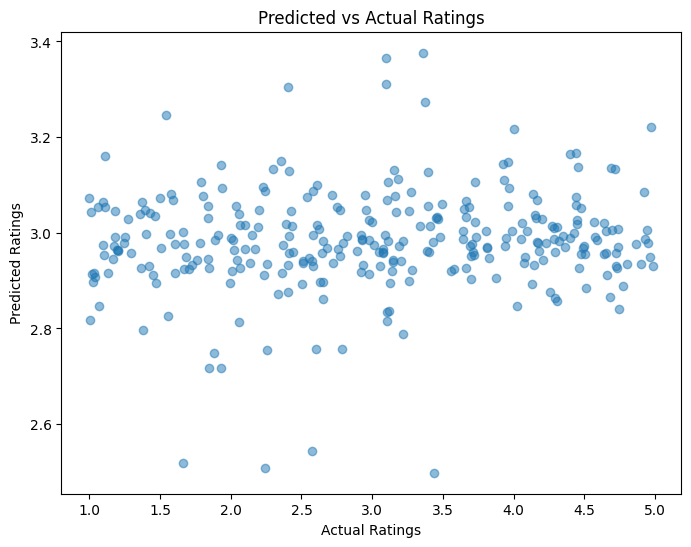

In [34]:
# Plot predicted vs actual ratings
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.title("Predicted vs Actual Ratings")
plt.xlabel("Actual Ratings")
plt.ylabel("Predicted Ratings")
plt.show()

# Analyzing Predicted Ratings Distribution

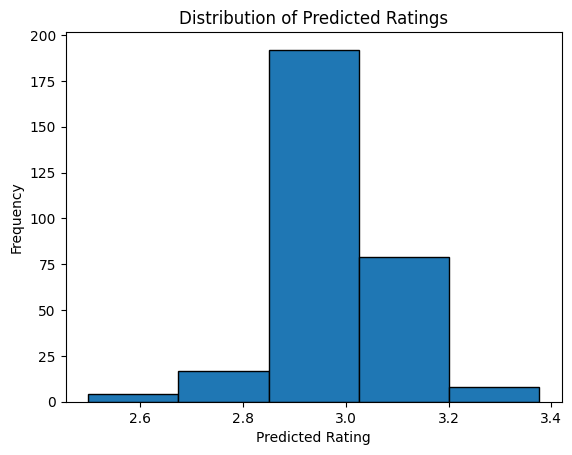

In [39]:
import matplotlib.pyplot as plt

# Simulate predicted ratings for users
predicted_ratings = y_pred

# Plot histogram of predicted ratings
plt.hist(predicted_ratings, bins=5, edgecolor='black')
plt.title("Distribution of Predicted Ratings")
plt.xlabel("Predicted Rating")
plt.ylabel("Frequency")
plt.show()

This mentions 3.0 is the most common rating and 2.5 comes second.

# Method 2 - XG BOOST MODEL

# Initialize, Build and Train the XGBoost Model

In [40]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import numpy as np

# Initialize the XGBoost Regressor
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', 
                             n_estimators=100, 
                             max_depth=6, 
                             learning_rate=0.1, 
                             random_state=42)

# Train the model on the training data
xgb_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = xgb_model.predict(X_test)

# Assess performance using RMSE, MAE, MSE

In [41]:
# Evaluate the model's performance
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mse = mean_squared_error(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared: {r2}")
print(f"RMSE: {rmse}")
print(f'Mean Squared Error: {mse}')


Mean Absolute Error (MAE): 1.0114612711921525
R-squared: -0.11417819399248041
RMSE: 1.20045107043947
Mean Squared Error: 1.4410827725192694


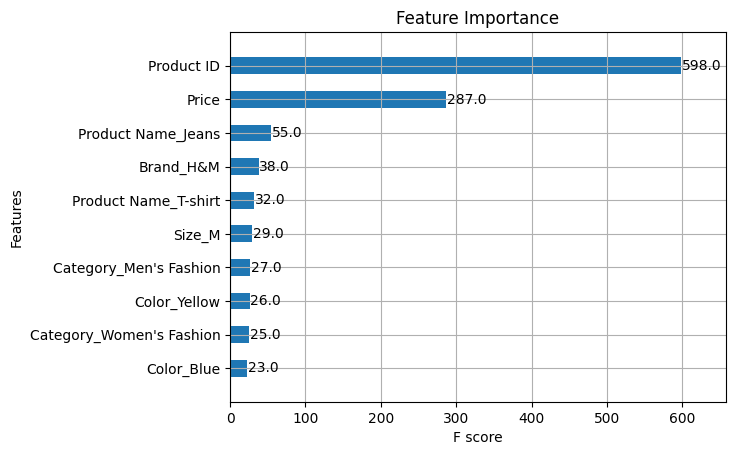

In [42]:
# Plot feature importance
xgb.plot_importance(xgb_model, importance_type='weight', max_num_features=10, height=0.5)
plt.title('Feature Importance')
plt.show()

# Hyperparameter search using GridSearchCV

In [43]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 20],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0],
    'gamma': [0, 0.1, 0.2]
}

# Create an instance of XGBRegressor
xgb_regressor = XGBRegressor(objective='reg:squarederror')

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=xgb_regressor, param_grid=param_grid, 
                           scoring='neg_mean_squared_error', cv=3, verbose=1, n_jobs=-1)

# Fit the grid search
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score (Negative MSE):", grid_search.best_score_)

# Use the best model to predict
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

Fitting 3 folds for each of 729 candidates, totalling 2187 fits
Best Parameters: {'colsample_bytree': 0.7, 'gamma': 0, 'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 100, 'subsample': 0.9}
Best Score (Negative MSE): -1.370285545579997


# Method 3 - CATBOOST MODEL

Here we are predicting predicting a target like ratings (a continuous variable) based on a variety of features (both numerical and categorical) features such as Price (numerical), Product Name, User ID, Category, Size, Color, Brand (categorical).

In [50]:
import pandas as pd
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Define target and features
X = df.drop(columns=['Rating'])
y = df['Rating']

# Categorical features
categorical_features = ['User ID', 'Product Name', 'Brand', 'Category', 'Color', 'Size']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create CatBoost model
model_cat = CatBoostRegressor(
    iterations=1000,        # Number of boosting rounds
    depth=10,               # Depth of trees
    learning_rate=0.1,      # Learning rate
    loss_function='RMSE',   # Loss function for regression
    cat_features=categorical_features,  # Specify which features are categorical
    verbose=200             # Output every 200 iterations
)

# Train the model
model_cat.fit(X_train, y_train)

# Make predictions
y_pred_cat = model_cat.predict(X_test)

y_pred_cat

0:	learn: 1.1378279	total: 66.4ms	remaining: 1m 6s
200:	learn: 0.2428673	total: 3s	remaining: 11.9s
400:	learn: 0.0529970	total: 5.95s	remaining: 8.88s
600:	learn: 0.0152653	total: 8.83s	remaining: 5.86s
800:	learn: 0.0049160	total: 11.7s	remaining: 2.9s
999:	learn: 0.0014086	total: 14.5s	remaining: 0us


array([2.79847407, 3.24117969, 2.77071336, 2.98359086, 3.08009387,
       3.05278201, 3.10711349, 3.00639139, 3.28889221, 3.19129005,
       2.98723312, 3.57395499, 3.03033466, 3.70978837, 3.30053147,
       2.7521012 , 3.06322309, 2.8116278 , 2.37473381, 3.35576588,
       2.5005864 , 3.16710035, 2.6292251 , 2.86780864, 2.88673075,
       2.64511776, 3.36713682, 3.72108448, 3.11665892, 3.32768977,
       3.17213184, 3.00463948, 2.76339803, 2.62394638, 2.83684311,
       2.56230354, 3.19950762, 3.33488509, 3.39185815, 3.04513094,
       3.09371651, 3.0122612 , 2.97146686, 3.29830516, 2.49491534,
       3.28715415, 3.03719895, 3.56680802, 3.00717038, 3.10360804,
       2.94450995, 3.41362217, 3.59775384, 2.81082142, 3.36954897,
       3.08887006, 2.97136659, 2.82576522, 2.88951577, 2.77971514,
       2.78307446, 3.20711952, 2.5822271 , 3.19751306, 2.93130438,
       2.90675597, 2.90248282, 3.08379831, 3.16210153, 2.70133184,
       2.48434952, 2.29903843, 3.1014406 , 3.04699865, 2.71708

In [51]:
# Evaluate performance (RMSE)
rmse = mean_squared_error(y_test, y_pred_cat, squared=False)
print(f"Root Mean Squared Error (RMSE): {rmse}")

Root Mean Squared Error (RMSE): 1.239376180158428


In [100]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred_cat)
print(f"R-squared: {r2}")

R-squared: -0.06656875462670997


This seems like a reasonable RMSE, even though R-square is not that significant but RMSE is pretty reasonable.

In [101]:
# Assuming `y_pred` are the predicted ratings and `X_test` contains the user-product pairs
X_test['Predicted Rating'] = y_pred_cat

# Sort by user ID and predicted rating to get top N recommendations
top_n_recommendations = X_test.sort_values(by=['User ID', 'Predicted Rating'], ascending=[True, False])

# For each user, get top N recommendations (e.g., top 3)
top_n_recommendations = top_n_recommendations.groupby('User ID').head(3)

print(top_n_recommendations[['User ID', 'Product ID', 'Predicted Rating']])

     User ID  Product ID  Predicted Rating
985        1         986          3.818721
849        2         850          2.902957
866        3         867          3.083798
823        3         824          2.640018
299        3         300          2.494915
..       ...         ...               ...
527       98         528          2.867809
72        98          73          2.864019
678       99         679          3.052782
110       99         111          2.924745
668      100         669          2.455261

[181 rows x 3 columns]


We first Sort out the predicted ratings for each user in descending order and then Select the top N products with the highest predicted ratings.

This gives us the Top-N recommended products for each user based on the predicted ratings.

# Method 4 - Singular Value Decomposition (SVD)

Here we are using SVD (Singular Value Decomposition) for collaborative filtering-based recommendation, that specifically shows how the User will rate a particular Product.

In [53]:
from sklearn.decomposition import TruncatedSVD

# Create a user-item matrix (User x Movie)
# Create user-item interaction matrix (userId x productId)
user_item_matrix = df.pivot(index='User ID', columns='Product ID', values= "Rating")

# Fill missing values with 0 (indicating no interaction)
user_item_matrix = user_item_matrix.fillna(0)

print(user_item_matrix.head())

Product ID  1     2     3     4     5     6     7     8     9     10    ...  \
User ID                                                                 ...   
1            0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
2            0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
3            0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
4            0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
5            0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   

Product ID  991   992   993   994   995   996   997   998   999   1000  
User ID                                                                 
1            0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
2            0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
3            0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
4            0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
5       

# Collaborative Filtering Using Matrix Factorization (SVD)

Using Collaborative Filtering that ises uses user-item interactions (e.g., user ratings for products) to predict how a user might rate an item.

In [54]:
# Apply SVD for collaborative filtering (matrix factorization)
svd = TruncatedSVD(n_components=20)  # Use 20 latent features
latent_matrix = svd.fit_transform(user_item_matrix)

# Reconstruct the matrix
reconstructed_matrix = svd.inverse_transform(latent_matrix)

# Example: Recommend products for a user
user_id = 1

user_ratings = reconstructed_matrix[user_id - 1]  # Indexing is 0-based, so we subtract 1

recommended_product_indices = user_ratings.argsort()[::-1]  # Sort products by predicted rating

# Display top 5 recommended products for user 1
recommended_products = df.iloc[recommended_product_indices[:5]]
print("Top 5 Recommended Products:")
print(recommended_products[['User ID', 'Product ID', 'Rating']])

Top 5 Recommended Products:
     User ID  Product ID    Rating
165      100         166  4.743824
81       100          82  4.612706
706      100         707  4.295813
565      100         566  4.024159
424      100         425  3.812086


In [55]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import StandardScaler

# Prepare product features for content-based filtering
product_features = df_new[['Price'] + [col for col in df_new.columns if 'Product_Name' in col or 'Brand' in col]]

# Standardize continuous features (like price)
scaler = StandardScaler()
scaled_features = scaler.fit_transform(product_features)

# Calculate the cosine similarity matrix
cosine_sim = cosine_similarity(scaled_features)

# Example: Recommend products similar to product 101 (Red T-Shirt)
def get_similar_products(product_id, top_n=5):
    idx = df_new[df_new['Product ID'] == product_id].index[0]
    similarity_scores = list(enumerate(cosine_sim[idx]))
    similarity_scores = sorted(similarity_scores, key=lambda x: x[1], reverse=True)
    
    # Get top N most similar products
    top_similar_products = [df_new['Product ID'][i[0]] for i in similarity_scores[1:top_n + 1]]
    return df_new[df_new['Product ID'].isin(top_similar_products)]

similar_products = get_similar_products(101)

print(similar_products[['Product ID', 'Price', 'Rating']])

     Product ID  Price    Rating
322         323     95  2.326168
548         549     96  4.283951
560         561     96  3.968456
566         567     96  1.206723
857         858     96  4.451841


In [56]:
# Collaborative recommendations for user (using SVD)
collaborative_recommendations = recommended_products[['Product ID', 'Price', 'Rating']]

# Content-based recommendations for a product (using cosine similarity)
content_based_recommendations = get_similar_products(1)

# Combine both recommendation lists
hybrid_recommendations = pd.concat([collaborative_recommendations, content_based_recommendations[['Product ID', 'Price', 'Rating']]])
print("Hybrid Recommendations (Collaborative + Content-Based):")
print(hybrid_recommendations.drop_duplicates())

Hybrid Recommendations (Collaborative + Content-Based):
     Product ID  Price    Rating
165         166     96  4.743824
81           82     31  4.612706
706         707     68  4.295813
565         566     80  4.024159
424         425     96  3.812086
42           43     39  3.601869
75           76     39  2.974139
562         563     39  4.043087
657         658     40  3.252305
695         696     39  4.592767


In [57]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Calculate RMSE for collaborative filtering (SVD)
rmse = np.sqrt(mean_squared_error(user_item_matrix.values, reconstructed_matrix))

print(f"RMSE for Collaborative Filtering (SVD): {rmse}")

RMSE for Collaborative Filtering (SVD): 0.26662362821242525


The RMSE value of 0.2666 for SVD-based Collaborative Filtering model suggests that the model is performing well.

# Segmenting the users into spending group

Segmenting users into high-spending or low-spending group can be used in data analysis and marketing strategy. By doing this, we can personalize marketing efforts, improve customer experience, and optimize business strategies. Here's I segment users based on these a key dimension — spending as how many users purchase the most products.

High-Spending: Users whose total spending or average purchase amount is above a threshold, 70.

Low-Spending: Users whose total spending or average purchase amount is below a certain threshold, which is 70.

In [58]:
# craete a new dataframe

df_seg = pd.DataFrame(df)

In [59]:
# Ensure 'Price' is always treated as an iterable (even if it's a single integer)

def handle_purchase_prices(Price):
    # since it's not a list or iterable, we will first make it a list
    if isinstance(Price, int):
        return [Price]
    return Price

In [60]:
# Apply the function to ensure 'purchase_prices' is a list

df_seg['Price'] = df_seg['Price'].apply(handle_purchase_prices)

In [61]:
# Feature: Total Purchase Amount (Total amount spent by the user)
df_seg['total_purchase_amount'] = df_seg['Price'].apply(lambda x: sum(x))


In [62]:
# Set thresholds for segmentation
spending_threshold = 70  # High spending if total_purchase_amount > 70

In [63]:
# Create new segmentation columns
df_seg['spending_segment'] = np.where(df_seg['total_purchase_amount'] > spending_threshold, 'High Spending', 'Low Spending')

In [64]:
df_seg = df_seg.drop(columns = ["Price"])

In [65]:
df_seg.head()

,User ID,Product ID,Product Name,Brand,Category,Rating,Color,Size,total_purchase_amount,spending_segment
0,19,1,Dress,Adidas,Men's Fashion,1.043159,Black,XL,40,Low Spending
1,97,2,Shoes,H&M,Women's Fashion,4.026416,Black,L,82,High Spending
2,25,3,Dress,Adidas,Women's Fashion,3.337938,Yellow,XL,44,Low Spending
3,57,4,Shoes,Zara,Men's Fashion,1.049523,White,S,23,Low Spending
4,79,5,T-shirt,Adidas,Men's Fashion,4.302773,Black,M,79,High Spending


# CatBoost Model with spending_segment column

In [66]:
import pandas as pd
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Define target and features
X = df_seg.drop(columns=['Rating'])
y = df_seg['Rating']

# Categorical features
categorical_features = ['User ID', 'Product Name', 'Brand', 'Category', 'Color', 'Size', 'spending_segment']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create CatBoost model
model_seg = CatBoostRegressor(
    iterations=1000,        # Number of boosting rounds
    depth=10,               # Depth of trees
    learning_rate=0.1,      # Learning rate
    loss_function='RMSE',   # Loss function for regression
    cat_features=categorical_features,  # Specify which features are categorical
    verbose=200             # Output every 200 iterations
)

# Train the model
model_seg.fit(X_train, y_train)

# Make predictions
y_pred_seg = model_seg.predict(X_test)

# Evaluate performance (RMSE)
rmse = mean_squared_error(y_test, y_pred_seg, squared=False)
print(f"Root Mean Squared Error (RMSE): {rmse}")


0:	learn: 1.1346041	total: 28.6ms	remaining: 28.5s
200:	learn: 0.2539151	total: 3.27s	remaining: 13s
400:	learn: 0.0551810	total: 6.35s	remaining: 9.49s
600:	learn: 0.0164877	total: 9.26s	remaining: 6.14s
800:	learn: 0.0048373	total: 12.1s	remaining: 3.01s
999:	learn: 0.0016200	total: 15.1s	remaining: 0us
Root Mean Squared Error (RMSE): 1.242363379820175


In [99]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred_seg)
print(f"R-squared: {r2}")

R-squared: -0.07171633364028551


In [67]:
y_pred_seg

array([2.77577787, 3.1082565 , 2.92779141, 2.50297215, 2.65577412,
       2.80567984, 3.26872438, 3.13667754, 3.3456565 , 3.26077689,
       3.24197328, 3.71751182, 3.03433233, 3.26340126, 3.35784897,
       2.74843029, 3.5067117 , 2.81259443, 2.61472403, 3.40737165,
       2.53005293, 2.96528899, 2.94938162, 3.33069437, 2.91615586,
       3.12120166, 3.32477552, 3.93581557, 2.87013953, 3.4082656 ,
       2.66082688, 3.12402196, 2.84423519, 2.59816182, 3.08598846,
       2.77533142, 3.00972588, 2.71499735, 2.76088226, 3.07630813,
       3.23080699, 2.96195481, 3.38035914, 3.79232317, 2.81524315,
       3.55749109, 3.48109363, 3.51135684, 3.01618361, 3.30718962,
       3.10557701, 3.54756618, 3.31546109, 2.96961387, 3.26744867,
       3.0248418 , 2.90688931, 2.91698498, 3.36889279, 2.62735682,
       2.99361786, 3.11563525, 2.96905037, 2.97871417, 3.16718413,
       3.06933382, 2.81205657, 2.91404729, 3.29624933, 2.60187223,
       3.04142787, 2.35734682, 3.02332417, 3.19150204, 3.02991

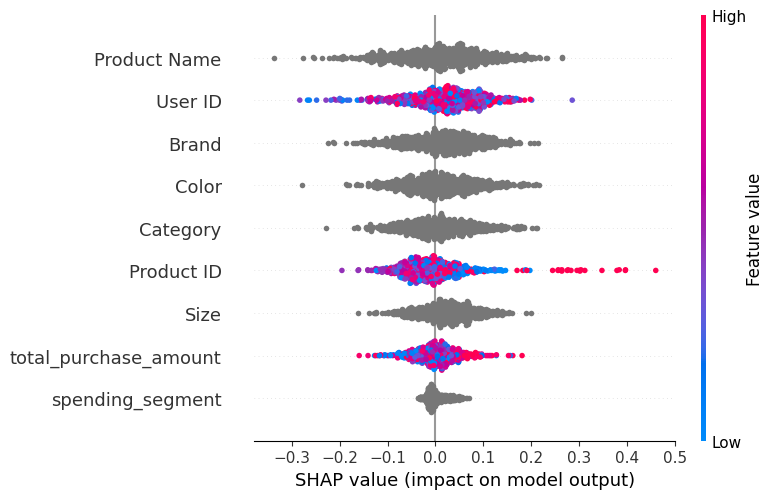

In [68]:
# Assuming you used CatBoost for training
import shap

# Fit the model (example using CatBoost)
# model.fit(X_train, y_train)

# SHAP (SHapley Additive exPlanations) for feature importance
explainer = shap.TreeExplainer(model_seg)
shap_values = explainer.shap_values(X_train)

# Summary plot for feature importance
shap.summary_plot(shap_values, X_train)

# Segment-wise Analysis

# Compute Average Rating per Spending Segment

Calculating the average rating for each spending segment (e.g., Low Spending, High Spending) to see if there's a noticeable difference between them.

In [76]:
# Assuming 'data' is your dataframe containing 'spending_segment' and 'ratings'

# Group by spending segment and calculate the mean of ratings
average_ratings_by_segment = df_seg.groupby('spending_segment')['Rating'].mean()

print("Average Ratings by Spending Segment:")
print(average_ratings_by_segment)

Average Ratings by Spending Segment:
spending_segment
High Spending    3.035180
Low Spending     2.970891
Name: Rating, dtype: float64


There is somewhat difference between high spenders rating vs low spender rating. High spenders tends to rate products slightly more positively than low spenders.

# Visualize the Distribution of Ratings for Each Segment

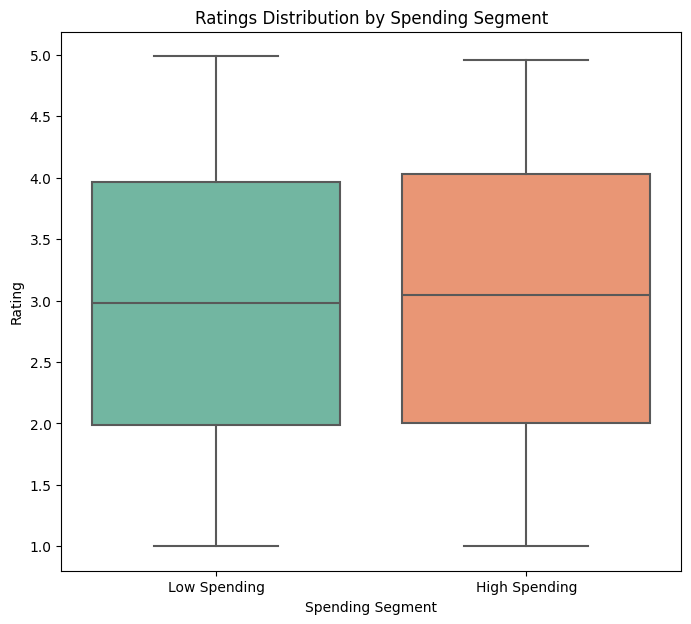

In [88]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot to compare ratings between spending segments
plt.figure(figsize=(8, 7))
sns.boxplot(x='spending_segment', y='Rating', data=df_seg, palette="Set2")
plt.title('Ratings Distribution by Spending Segment')
plt.xlabel('Spending Segment')
plt.ylabel('Rating')
plt.show()

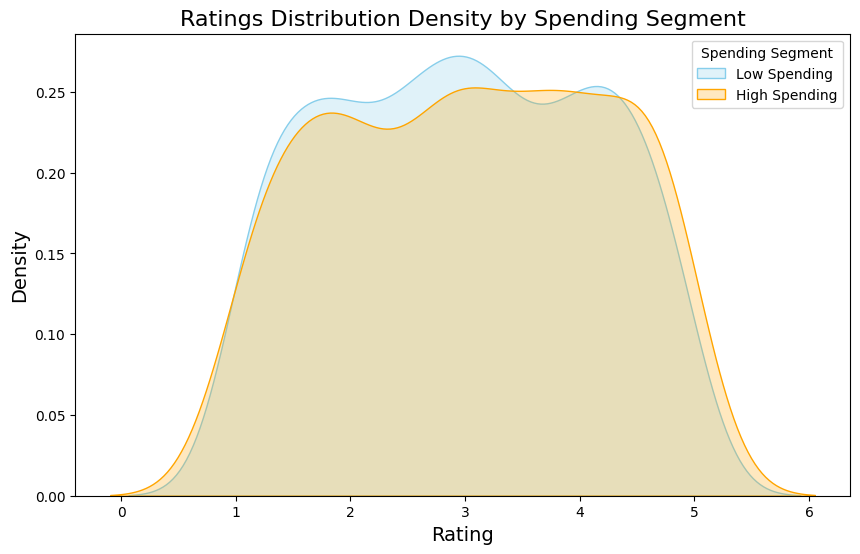

In [92]:
# Create KDE plot to show the density of ratings for each spending segment
plt.figure(figsize=(10, 6))

sns.kdeplot(data=df_seg[df_seg['spending_segment'] == 'Low Spending']['Rating'], label='Low Spending', shade=True, color='skyblue')
sns.kdeplot(data=df_seg[df_seg['spending_segment'] == 'High Spending']['Rating'], label='High Spending', shade=True, color='orange')

# Add more segments if applicable
# sns.kdeplot(data[data['Spending Segment'] == 'Medium Spending']['rating'], label='Medium Spending', shade=True, color='green')

# Title and labels
plt.title('Ratings Distribution Density by Spending Segment', fontsize=16)
plt.xlabel('Rating', fontsize=14)
plt.ylabel('Density', fontsize=14)

# Show the legend and plot
plt.legend(title='Spending Segment')
plt.show()


Summary: 

CatBoost, a gradient boosting framework works well with our training set beacuse of the presence of high number of categorical features and is also effective in predicting a continuous outcome (rating). 